<h1> ESTUDIO SOBRE LOS DATOS DEL CENSO </h1>

<hr>
El objetivo de este archivo es explorar las posibilidad de aplicar regresiones para estimar la poblacion en las provincias de argentina. Para ello vamos a aplicar tecnicas estimativas relacionadas a las series temporales.
<hr>

Estudio de censos - Buscamos aplicar CDD en los datos del censo y ver si sirve de algo

In [2]:
import pandas as pd
import numpy as np
from pymysql import connect
import os
import sys 
import matplotlib.pyplot as plt

# Obtener la dirección del directorio actual
current_dir = os.getcwd()

# Obtener la dirección del directorio padre
parent_dir = os.path.dirname(current_dir)

#Creamos direccion a la carpeta de credenciales
path_credenciales = os.path.join(parent_dir,'Credenciales_folder')

#Añadimos a las direcciones el path de las credenciales
sys.path.append(path_credenciales)

from credenciales_bdd import Credenciales


 
cred_dwh_socio = Credenciales('dwh_sociodemografico')
cred_ipecd_economico = Credenciales('ipecd_economico')


# Imprimir las direcciones
print("Directorio actual:", current_dir)
print("Directorio padre:", parent_dir)
print("Directorio credenciales:", path_credenciales)


Directorio actual: /home/usuario/Escritorio/entorno_trabajo/src/scrapingTrabajo/notebooks_cdd
Directorio padre: /home/usuario/Escritorio/entorno_trabajo/src/scrapingTrabajo
Directorio credenciales: /home/usuario/Escritorio/entorno_trabajo/src/scrapingTrabajo/Credenciales_folder


Nos conectamos a la bdd

In [3]:

#Conexion al dwh sociodemografico
conn_dwh = connect(user=cred_dwh_socio.user,password=cred_dwh_socio.password,database=cred_dwh_socio.database,
               host=cred_dwh_socio.host)
cursor_dwh = conn_dwh.cursor()

#Conexion al IPECD economico
conn_ipecd = connect(user=cred_ipecd_economico.user,password=cred_ipecd_economico.password,database=cred_ipecd_economico.database,
               host=cred_ipecd_economico.host)
cursor_ipecd = conn_ipecd.cursor()


Extraemos los datos correspondiente a censos

In [4]:
df_censo_provincias = pd.read_sql('SELECT * FROM censo_provincia',conn_ipecd)


/tmp/ipykernel_10966/1525094900.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_censo_provincias = pd.read_sql('SELECT * FROM censo_provincia',conn_ipecd)


Ordenamos los datos por fecha

In [5]:
df_ordenado = df_censo_provincias.sort_values(['Fecha'])

Buscamos los datos de corrientes

In [6]:
datos_nea = df_ordenado[df_ordenado['ID_Provincia'].isin([18,22,30,34,54])]

In [7]:
datos_nea

,Fecha,ID_Provincia,ID_Departamento,Poblacion
672,2010-01-01,22,22168,29936.000000
656,2010-01-01,22,22161,4210.000000
480,2010-01-01,22,22084,60499.000000
496,2010-01-01,22,22091,25950.000000
512,2010-01-01,22,22098,56458.000000
...,...,...,...,...
2207,2025-01-01,34,34049,95149.766511
511,2025-01-01,22,22091,26621.721012
2223,2025-01-01,34,34056,73284.363231
2239,2025-01-01,34,34063,18769.040568


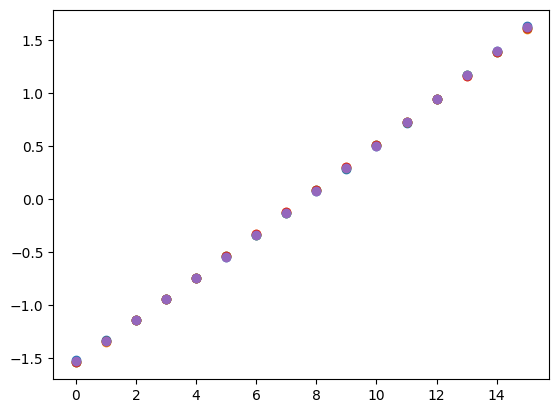

In [8]:
#Datos estandarizados

lista_ids = ['18','22','30','34','54'] #Id de los DEPARTAMENTOS principales (capitales)

for id in lista_ids:

    #Datos de la poblacion
    poblacion_provincia = datos_nea['Poblacion'][datos_nea['ID_Departamento'] == id]

    #Datos estandarizados 
    datos_estandarizados = (poblacion_provincia - poblacion_provincia.mean()) / poblacion_provincia.std()

    #Largo de datos
    x_largo = np.arange(0,len(datos_estandarizados))

    plt.scatter(x_largo,datos_estandarizados,label = id)

In [12]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Ejemplo de datos (X_train: preguntas, y_train: respuestas)
X_train = ["¿Qué es una RNN?", "¿Cómo funciona una LSTM?"]
y_train = ["Una RNN es una Red Neuronal Recurrente.", "Una LSTM es un tipo de RNN."]

# Preprocesamiento de datos
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=10)

# Modelo de RNN con LSTM
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64, input_length=10))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
model.fit(X_train_padded, np.array([1, 1]), epochs=10, batch_size=32)

# Predicción
X_test = ["¿Qué es una LSTM?"]
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=10)
predicciones = model.predict(X_test_padded)
print(predicciones)


ModuleNotFoundError: No module named 'distutils'

Vamos a aplicar una Estadarizacion de datos para poner en escala similar a los datos y ver como se comportan